In [24]:
import pandas as pd
from  nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('Smscollection.csv',encoding='utf8',sep=';',error_bad_lines=False)

b'Skipping line 30: expected 2 fields, saw 3\nSkipping line 46: expected 2 fields, saw 4\nSkipping line 53: expected 2 fields, saw 6\nSkipping line 57: expected 2 fields, saw 4\nSkipping line 80: expected 2 fields, saw 4\nSkipping line 180: expected 2 fields, saw 6\nSkipping line 202: expected 2 fields, saw 4\nSkipping line 203: expected 2 fields, saw 4\nSkipping line 205: expected 2 fields, saw 8\nSkipping line 211: expected 2 fields, saw 4\nSkipping line 231: expected 2 fields, saw 4\nSkipping line 233: expected 2 fields, saw 4\nSkipping line 238: expected 2 fields, saw 4\nSkipping line 241: expected 2 fields, saw 3\nSkipping line 357: expected 2 fields, saw 4\nSkipping line 375: expected 2 fields, saw 4\nSkipping line 407: expected 2 fields, saw 4\nSkipping line 417: expected 2 fields, saw 3\nSkipping line 427: expected 2 fields, saw 6\nSkipping line 432: expected 2 fields, saw 6\nSkipping line 437: expected 2 fields, saw 5\nSkipping line 438: expected 2 fields, saw 8\nSkipping line

In [11]:
df_2 = df
df_2

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5228,spam,This is the 2nd time we have tried 2 contact u...
5229,ham,Will ü b going to esplanade fr home?
5230,ham,"Pity, * was in mood for that. So...any other s..."
5231,ham,The guy did some bitching but I acted like i'd...


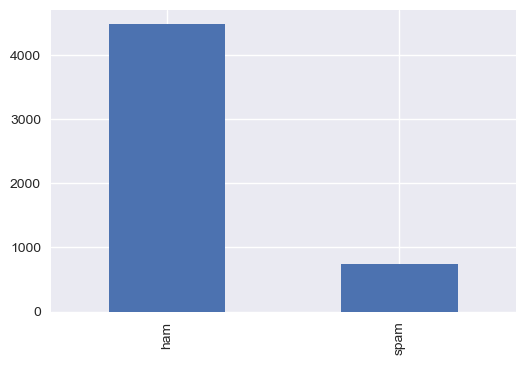

In [38]:
plt.style.use('seaborn')
plt.figure(figsize=(6, 4), dpi=100)
df_2['label'].value_counts().plot(kind='bar')

In [19]:
# upper words to lower words
df_2['text'] = df_2['text'].str.lower()
df_2['text_new'] = df_2['text']

In [20]:
# remove the stop words
words = stopwords.words('english')
for w in ['!',',','.','?','-']:
    words.append(w)

In [28]:
# get tf-idf vector
vectorizer=TfidfVectorizer(binary=True)
x1 = vectorizer.fit_transform(df_2['text_new'])
y = df_2['label']

In [33]:
# get word frequency vector
vectorizer_2 = CountVectorizer(binary=True)
x2 = vectorizer_2.fit_transform(df_2['text_new'])
y = df_2['label']

In [34]:
# get train dataset and test dataset
X1_train, X1_test, y_train, y_test = train_test_split(x1, y, random_state=100)
X2_train, X2_test, y_train, y_test = train_test_split(x2, y, random_state=100)

In [35]:
# use Bayes model
clf = MultinomialNB(alpha=1, fit_prior=True)
clf.fit(X1_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

accuracy on test data:  0.961038961038961


In [36]:
clf = MultinomialNB(alpha=1, fit_prior=True)
clf.fit(X2_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

accuracy on test data:  0.988540870893812
